# Relatório fechamento de mercado

### Envio automático de relatório de fechamento do Ibov e Dólar.

Puxa os dados do Yahoo Finance, pega o valor do fechamento e calcula o retorno mensal e anual.

Envia um mini-relatório por e-mail (utlizando o Outlook no Windows) com as informações e os gráficos anuais de cada um dos ativos (Dólar e Ibov)

## 1 - Importação das Bibliotecas

In [1]:
# !pip install yfinance==0.1.74
# !pip install pywin32
# !pip install mplcyberpunk

In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import win32com.client as win32
import os

## 2 - Pegar os dados com o Yahoo Finance

In [2]:
codigos_de_negociacao = ['^BVSP', 'BRL=X']

hoje = dt.datetime.now()

um_ano_atras = hoje - dt.timedelta(days = 365)


dados_mercado = yf.download(codigos_de_negociacao, um_ano_atras, hoje)

display(dados_mercado)


[*********************100%***********************]  2 of 2 completed


Adj Close                    Close                   High  \
               BRL=X          ^BVSP     BRL=X          ^BVSP   BRL=X   
Date                                                                   
2022-02-09  5.258400  112461.000000  5.258400  112461.000000  5.2880   
2022-02-10  5.234500  113359.000000  5.234500  113359.000000  5.2446   
2022-02-11  5.248700  113572.000000  5.248700  113572.000000  5.2512   
2022-02-14  5.249956  113807.000000  5.249956  113807.000000  5.2633   
2022-02-15  5.214000  114660.000000  5.214000  114660.000000  5.2199   
...              ...            ...       ...            ...     ...   
2023-02-02  5.053500  109935.000000  5.053500  109935.000000  5.0545   
2023-02-03  5.049200  108490.000000  5.049200  108490.000000  5.1347   
2023-02-06  5.149800  108456.000000  5.149800  108456.000000  5.2060   
2023-02-07  5.145700  107920.000000  5.145700  107920.000000  5.2057   
2023-02-08  5.209300  109951.492188  5.209300  109951.492188  5.2401   

                           Low                Open           Volume  \
               ^BVSP     BRL=X     ^BVSP     BRL=X     ^BVSP  BRL=X   
Date                                                                  
2022-02-09  113163.0  5.232774  111710.0  5.256489  112233.0      0   
2022-02-10  113812.0  5.170000  112163.0  5.231429  112462.0      0   
2022-02-11  114899.0  5.182800  113128.0  5.248600  113368.0      0   
2022-02-14  114167.0  5.195300  113358.0  5.250500  113643.0      0   
2022-02-15  114819.0  5.166288  113882.0  5.213700  113905.0      0   
...              ...       ...       ...       ...       ...    ...   
2023-02-02  112943.0  4.941700  109747.0  5.053500  112072.0      0   
2023-02-03  110570.0  5.046758  108185.0  5.049200  110141.0      0   
2023-02-06  108710.0  5.147992  107416.0  5.149800  108518.0      0   
2023-02-07  109037.0  5.133384  107234.0  5.145700  108727.0      0   
2023-02-08       0.0  5.164117       0.0  5.209300       0.0      0   

                        
                 ^BVSP  
Date                    
2022-02-09  13794500.0  
2022-02-10  13267900.0  
2022-02-11  18602800.0  
2022-02-14  10757600.0  
2022-02-15  11649600.0  
...                ...  
2023-02-02  15241800.0  
2023-02-03  13235300.0  
2023-02-06  11514600.0  
2023-02-07  12956300.0  
2023-02-08         0.0  

[261 rows x 12 columns]

## 3 Manipulando os dados

### 3.1 - Seleção e Exclusão de dados

In [3]:
dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = ['dolar', 'ibovespa']
dados_fechamento = dados_fechamento.dropna()

display(dados_fechamento)

,dolar,ibovespa
Date,,
2022-02-09,5.258400,112461.000000
2022-02-10,5.234500,113359.000000
2022-02-11,5.248700,113572.000000
2022-02-14,5.249956,113807.000000
2022-02-15,5.214000,114660.000000
...,...,...
2023-02-02,5.053500,109935.000000
2023-02-03,5.049200,108490.000000
2023-02-06,5.149800,108456.000000


### 3.2 - Criando tabelas com outros timeframes

In [4]:
dados_anuais = dados_fechamento.resample("Y").last()
dados_mensais = dados_fechamento.resample("M").last()

## 4 - Calcular fechamento do dia, retorno no ano e retorno no mês do ativo

In [5]:
retorno_anual = dados_anuais.pct_change().dropna()
retorno_mensal = dados_mensais.pct_change().dropna()
retorno_diario = dados_fechamento.pct_change().dropna()

## 5 - Localizar o fechamento do dia anterior, retorno no mês e retorno no ano

In [6]:
# Pegando o último valor dos dataframes
fechamento_diario_dolar = retorno_diario.iloc[-1, 0]
fechamento_diario_ibov = retorno_diario.iloc[-1, 1]

retorno_mensal_dolar = retorno_mensal.iloc[-1, 0]
retorno_mensal_ibov = retorno_mensal.iloc[-1, 1]

retorno_anual_dolar = retorno_anual.iloc[-1, 0]
retorno_anual_ibov = retorno_anual.iloc[-1, 1]


# Formatar os valores em percentual com duas casas decimais
fechamento_diario_dolar = round((fechamento_diario_dolar * 100), 2)
fechamento_diario_ibov = round((fechamento_diario_ibov * 100), 2)
retorno_mensal_dolar = round((retorno_mensal_dolar * 100), 2)
retorno_mensal_ibov = round((retorno_mensal_ibov * 100), 2)
retorno_anual_dolar = round((retorno_anual_dolar * 100), 2)
retorno_anual_ibov = round((retorno_anual_ibov * 100), 2)

## 6 - Fazer os gráficos da performance

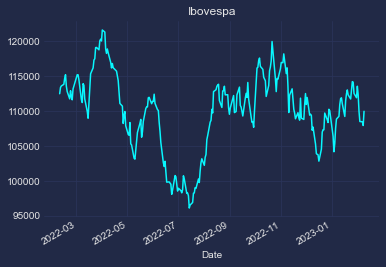

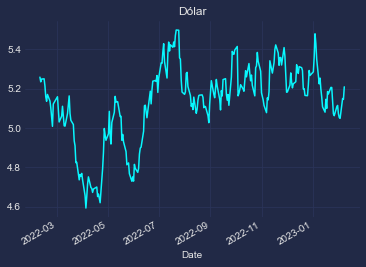

In [9]:
plt.style.use('cyberpunk')

# Gráfico Ibovespa
dados_fechamento.plot(y = "ibovespa", use_index = True, legend = False)
plt.title('Ibovespa')
plt.savefig("files/ibovespa.png", dpi=300)
plt.show()

# Gráfico Dolar
dados_fechamento.plot(y = "dolar", use_index = True, legend = False)
plt.title('Dólar')
plt.savefig("files/dolar.png", dpi=300)
plt.show()

## 7 - Enviar e-mail

In [12]:
outlook = win32.Dispatch("outlook.application")

email = outlook.CreateItem(0)

email.To = "gesiel@pedreirascontagem.com"
email.Subject = "Relatório Diário - Dólar & Ibovespa"
email.Body = f'''Prezado,

Bolsa:
No ano o Ibovespa está tendo uma rentabilidade de {retorno_anual_ibov}%,
No mês a rentabilidade é de {retorno_mensal_ibov}%.

Dólar:
No ano o Ibovespa está tendo uma rentabilidade de {retorno_anual_dolar}%,
No mês a rentabilidade é de {retorno_mensal_dolar}%.


No último dia útil, o fechamento do Ibovespa foi de {fechamento_diario_ibov}
No último dia útil, o fechamento do Dólar foi de {fechamento_diario_dolar}

Att,

Gesiel.
'''

# Pegando caminho da pasta atual
dir = os.getcwd()
anexo_ibovespa = dir + r"\files\ibovespa.png"
anexo_dolar = dir + r"\files\dolar.png"

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)


email.Send()
